**Nama**            : Fawwaz Rif'at Revista

**NIU**             : 565782

**Mata Kuliah**     : Pengolahan dan Analisis Citra Digital

**Tugas**           : Assignment 01 (Image Acquisition)

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Cek dimensi array
img=Image.open('./town.jpg')
img = np.array(img)
img.shape

(936, 1490)

In [3]:
# Cek ukuran asli gambar grayscale
img=Image.open('./town.jpg')
img = np.array(img)
h, w = len(img), len(img[0])
print("Ukuran Gambar :", w, "x", h)

Ukuran Gambar : 1490 x 936


In [4]:

# Cek ukuran asli gambar RGB atau CMY
img=Image.open('./cr.jpeg')
img = np.array(img)
h, w = len(img), len(img[0])
print("Ukuran Gambar :", w, "x", h)

Ukuran Gambar : 500 x 345


## **DOWNSAMPLING**

# MAX

In [5]:
def max_down(img, hd,wd):
    if img.ndim == 2: # Untuk gambar grayscale
        h, w = len(img), len(img[0])
        block_h = hd
        block_w = wd
        out_h, out_w = h // block_h, w // block_w
        out = [[0]*out_w for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                block = []
                for di in range(block_h):
                    for dj in range(block_w):
                        block.append(img[i*block_h + di][j*block_w + dj])

                out[i][j] = max(block)

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(out, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()
    else : # Untuk gambar RGB dan CMY
        h, w, c = len(img), len(img[0]), 3
        block_h = hd
        block_w = wd
        out_h, out_w = h // block_h, w // block_w
        out = [[[0]*c for _ in range(out_w)] for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                for k in range(c):
                    block = []
                    for di in range(hd):
                        for dj in range(wd):
                            block.append(img[i*hd + di][j*wd + dj][k])
                    out[i][j][k] = max(block)

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(np.array(out, dtype=np.uint8))
        plt.axis('off')
        plt.show()


Ukuran Piksel Gambar : 298 x 187


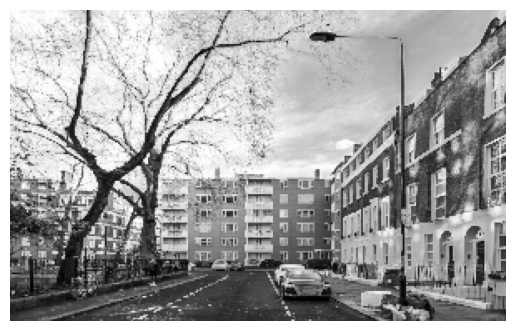

In [6]:
img=Image.open('./town.jpg')
img = np.array(img)
max_down(img,5,5)

Ukuran Piksel Gambar : 250 x 172


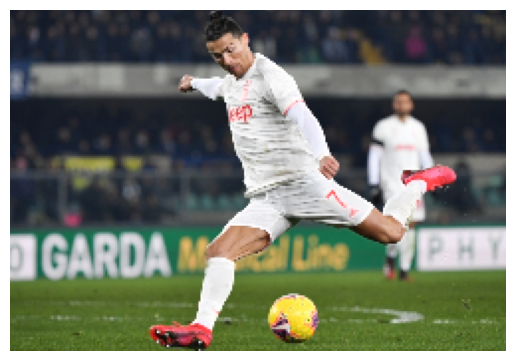

In [7]:
img=Image.open('./cr.jpeg')
img = np.array(img)
max_down(img,2,2)

# MEAN

In [8]:
def mean_down(img, hd,wd):
    if img.ndim == 2: # Untuk gambar grayscale
        h, w = len(img), len(img[0])
        block_h = hd
        block_w = wd
        pixel = block_h * block_w
        out_h, out_w = h // block_h, w // block_w
        out = [[0]*out_w for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                    total = 0.0
                    for di in range(block_h):
                        for dj in range(block_w):
                            total += img[i*block_h + di][j*block_w + dj]

                    out[i][j] = total / pixel

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(out, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()
    else : # Untuk gambar RGB dan CMY
        h, w, c = len(img), len(img[0]), 3
        block_h = hd
        block_w = wd
        out_h, out_w = h // block_h, w // block_w
        pixel = block_h * block_w
        out = [[[0]*c for _ in range(out_w)] for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                for k in range(c):
                    total = 0.0
                    for di in range(hd):
                        for dj in range(wd):
                            total += img[i*hd + di][j*wd + dj][k]
                    out[i][j][k] = total / pixel

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(np.array(out, dtype=np.uint8))
        plt.axis('off')
        plt.show()


Ukuran Piksel Gambar : 298 x 187


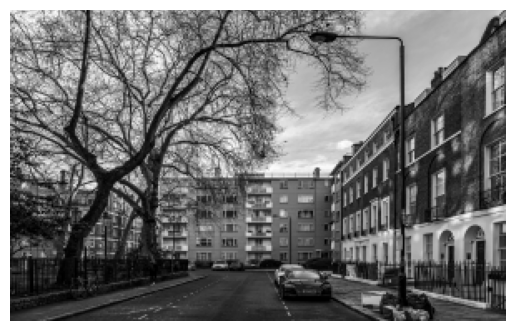

In [9]:
img=Image.open('./town.jpg')
img = np.array(img)
mean_down(img,5,5)

Ukuran Piksel Gambar : 250 x 172


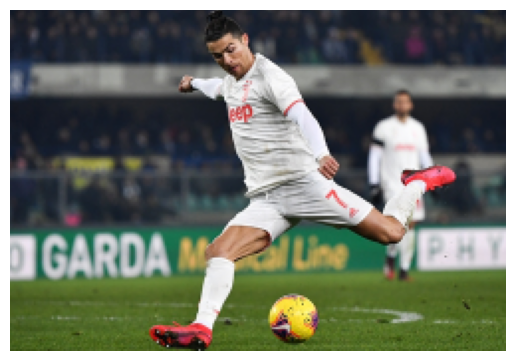

In [10]:
img=Image.open('./cr.jpeg')
img = np.array(img)
mean_down(img,2,2)

# MEDIAN

In [11]:
def median_down(img, hd,wd):
    if img.ndim == 2: # Untuk gambar grayscale
        h, w = len(img), len(img[0])
        block_h = hd
        block_w = wd
        out_h, out_w = h // block_h, w // block_w
        out = [[0]*out_w for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                block = []
                for di in range(block_h):
                    for dj in range(block_w):
                        block.append(img[i*block_h + di][j*block_w + dj])
                block = sorted(block)
                m = len(block)
                if m % 2 != 0:
                    out[i][j] = block[m//2]
                else:
                    out[i][j] = int(0.5*(block[m//2 - 1] + block[m//2]))

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(out, cmap='gray', vmin=0, vmax=255)
        plt.show()
    else : # Untuk gambar RGB
        h, w, c = len(img), len(img[0]), 3
        block_h = hd
        block_w = wd
        out_h, out_w = h // block_h, w // block_w
        out = [[[0]*c for _ in range(out_w)] for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                block = []
                for k in range (c) :
                    block = []
                    for di in range(block_h):
                        for dj in range(block_w):
                            block.append(img[i*block_h + di][j*block_w + dj][k])
                    block = sorted(block)
                    m = len(block)
                    if m % 2 != 0:
                        out[i][j][k] = block[m//2]
                    else:
                        out[i][j][k] = int(0.5 * (block[m//2 - 1] + block[m//2]))

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(np.array(out, dtype=np.uint8))
        plt.axis('off')
        plt.show()


Ukuran Piksel Gambar : 298 x 187


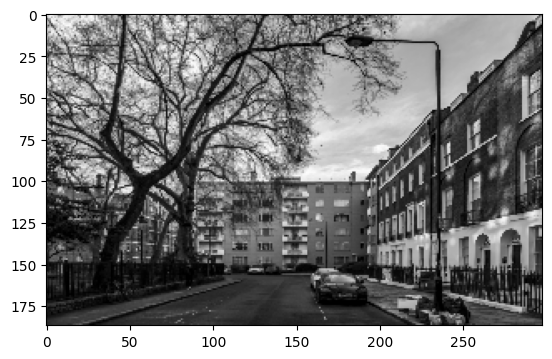

In [12]:
img=Image.open('./town.jpg')
img = np.array(img)
median_down(img,5,5)

/tmp/ipython-input-2832080351.py:45: RuntimeWarning: overflow encountered in scalar add
  out[i][j][k] = int(0.5 * (block[m//2 - 1] + block[m//2]))


Ukuran Piksel Gambar : 250 x 172


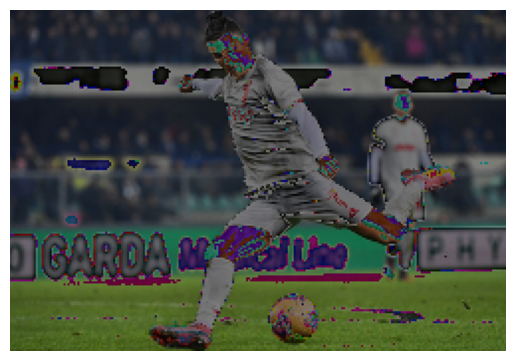

In [13]:
img=Image.open('./cr.jpeg')
img = np.array(img)
median_down(img,2,2)

## **UPSAMPLING**

# NEAREST NEIGHBOR

In [14]:
def nearest_neighbor_up(img, hd, wd):
    if img.ndim == 2: # Untuk gambar grayscale
        h, w = len(img), len(img[0])
        scale_h = hd
        scale_w = wd
        out_h, out_w = int(h * scale_h), int(w * scale_w)
        out = [[0]*out_w for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                src_i = min(h - 1, int(i / scale_h))
                src_j = min(w - 1, int(j / scale_w))
                out[i][j] = img[src_i][src_j]

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(out, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()

    else : # Untuk RGB dan CMY
        h, w, c = len(img), len(img[0]), 3
        scale_h = hd
        scale_w = wd
        out_h, out_w = int(h * scale_h), int(w * scale_w)
        out = [[[0]*c for _ in range(out_w)] for _ in range(out_h)]
        for i in range(out_h):
            for j in range(out_w):
                src_i = min(h - 1, int(i / scale_h))
                src_j = min(w - 1, int(j / scale_w))
                for k in range (c) :
                    out[i][j][k] = img[src_i][src_j][k]

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)

        plt.figure()
        plt.imshow(np.array(out, dtype=np.uint8))
        plt.axis('off')
        plt.show()

Ukuran Piksel Gambar : 2980 x 1872


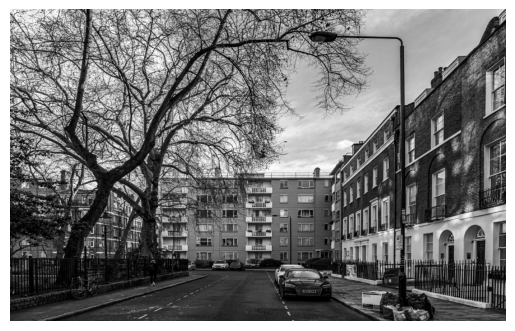

In [15]:
img=Image.open('./town.jpg')
img = np.array(img)
nearest_neighbor_up(img,2,2)

Ukuran Piksel Gambar : 1000 x 690


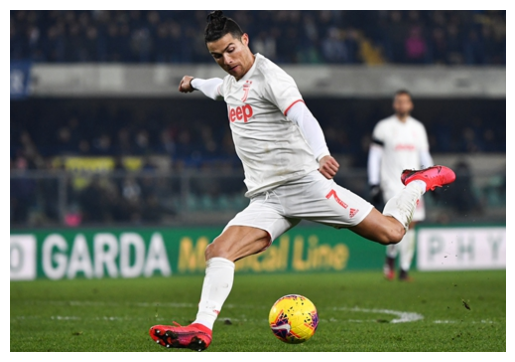

In [16]:
img=Image.open('./cr.jpeg')
img = np.array(img)
nearest_neighbor_up(img,2,2)

# BILINEAR

In [17]:
def bilinear_up(img, hd, wd):
    if img.ndim == 2:  # Untuk gambar grayscale
        h, w = img.shape
        out_h, out_w = h * hd - (hd - 1), w * wd - (wd - 1)
        out = [[0]*out_w for _ in range(out_h)]

        for i in range(out_h):
            for j in range(out_w):
                if i % hd == 0 and j % wd == 0:
                    out[i][j] = int(img[i // hd, j // wd])
                else:
                    neighbors = []
                    for di in [-1, 0, 1]:
                        for dj in [-1, 0, 1]:
                            x = round(i/hd) + di
                            y = round(j/wd) + dj
                            if 0 <= x < h and 0 <= y < w:
                                neighbors.append(img[x, y])
                    if neighbors:
                        out[i][j] = int(round(sum(neighbors)/len(neighbors)))
                    else:
                        out[i][j] = 0

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)
        plt.figure()
        plt.imshow(out, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()

    else:  # Untuk gambar RGB dan CMY
        h, w, c = img.shape
        out_h, out_w = h * hd - (hd - 1), w * wd - (wd - 1)
        out = [[[0]*c for _ in range(out_w)] for _ in range(out_h)]

        for i in range(out_h):
            for j in range(out_w):
                if i % hd == 0 and j % wd == 0:
                    for k in range(c):
                        out[i][j][k] = int(img[i // hd, j // wd, k])
                else:
                    for k in range(c):
                        neighbors = []
                        for di in [-1, 0, 1]:
                            for dj in [-1, 0, 1]:
                                x = round(i/hd) + di
                                y = round(j/wd) + dj
                                if 0 <= x < h and 0 <= y < w:
                                    neighbors.append(img[x, y, k])
                        if neighbors:
                            out[i][j][k] = int(round(sum(neighbors)/len(neighbors)))
                        else:
                            out[i][j][k] = 0

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)
        plt.figure()
        plt.imshow(np.uint8(out))
        plt.axis('off')
        plt.show()


/tmp/ipython-input-1317504110.py:20: RuntimeWarning: overflow encountered in scalar add
  out[i][j] = int(round(sum(neighbors)/len(neighbors)))


Ukuran Piksel Gambar : 2979 x 1871


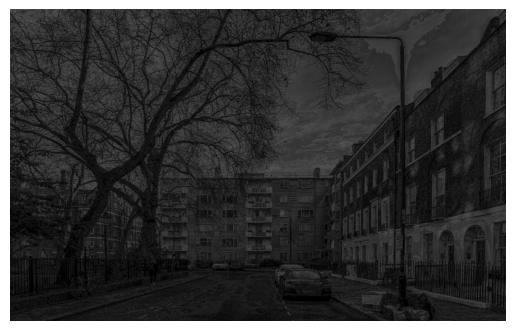

In [18]:
img=Image.open('./town.jpg')
img = np.array(img)
bilinear_up(img,2,2)

/tmp/ipython-input-1317504110.py:50: RuntimeWarning: overflow encountered in scalar add
  out[i][j][k] = int(round(sum(neighbors)/len(neighbors)))


Ukuran Piksel Gambar : 999 x 689


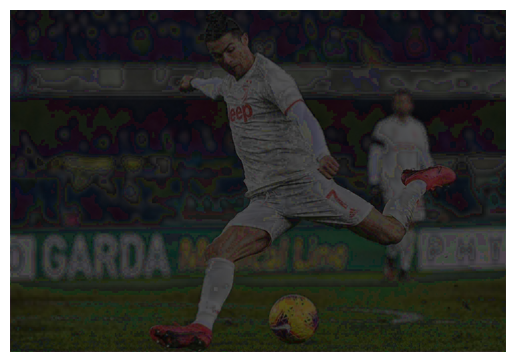

In [19]:
img=Image.open('./cr.jpeg')
img = np.array(img)
bilinear_up(img,2,2)

# BICUBIC

In [20]:
# Fungsi untuk bobot
def cubic_weight(t, a=-0.5):
    t = abs(t)
    if t <= 1:
        return (a + 2) * (t ** 3) - (a + 3) * (t ** 2) + 1
    elif t < 2:
        return a * (t ** 3) - 5 * a * (t ** 2) + 8 * a * t - 4 * a
    else:
        return 0

In [21]:
def bicubic_up(img, hd, wd):
    if img.ndim == 2:  # Untuk gambar grayscale
        h, w = img.shape
        out_h, out_w = h * hd - (hd - 1), w * wd - (wd - 1)
        out = [[0] * out_w for _ in range(out_h)]

        for i in range(out_h):
            for j in range(out_w):
                x = i / hd
                y = j / wd
                x_int = int(np.floor(x))
                y_int = int(np.floor(y))

                val = 0.0
                weight_sum = 0.0
                for m in range(-1, 3):
                    for n in range(-1, 3):
                        px = min(max(x_int + m, 0), h - 1)
                        py = min(max(y_int + n, 0), w - 1)
                        wx = cubic_weight(x - (x_int + m))
                        wy = cubic_weight(y - (y_int + n))
                        wght = wx * wy
                        val += img[px, py] * wght
                        weight_sum += wght
                if weight_sum != 0:
                    val /= weight_sum
                out[i][j] = int(np.clip(round(val), 0, 255))

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)
        plt.imshow(np.array(out, dtype=np.uint8), cmap="gray", vmin=0, vmax=255)
        plt.axis("off")
        plt.show()

    else:  # Untuk gambar RGB dan CMY
        h, w, c = img.shape
        out_h, out_w = h * hd - (hd - 1), w * wd - (wd - 1)
        out = [[[0] * c for _ in range(out_w)] for _ in range(out_h)]

        for i in range(out_h):
            for j in range(out_w):
                x = i / hd
                y = j / wd
                x_int = int(np.floor(x))
                y_int = int(np.floor(y))

                vals = [0.0] * c
                weight_sum = 0.0
                for m in range(-1, 3):
                    for n in range(-1, 3):
                        px = min(max(x_int + m, 0), h - 1)
                        py = min(max(y_int + n, 0), w - 1)
                        wx = cubic_weight(x - (x_int + m))
                        wy = cubic_weight(y - (y_int + n))
                        wght = wx * wy
                        for k in range(c):
                            vals[k] += img[px, py, k] * wght
                        weight_sum += wght
                if weight_sum != 0:
                    for k in range(c):
                        vals[k] /= weight_sum
                for k in range(c):
                    out[i][j][k] = int(np.clip(round(vals[k]), 0, 255))

        print("Ukuran Piksel Gambar :", out_w, "x", out_h)
        plt.imshow(np.array(out, dtype=np.uint8))
        plt.axis("off")
        plt.show()

Ukuran Piksel Gambar : 2979 x 1871


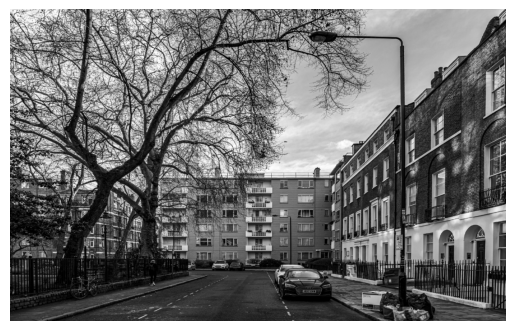

In [22]:
img=Image.open('./town.jpg')
img = np.array(img)
bicubic_up(img,2,2)

Ukuran Piksel Gambar : 999 x 689


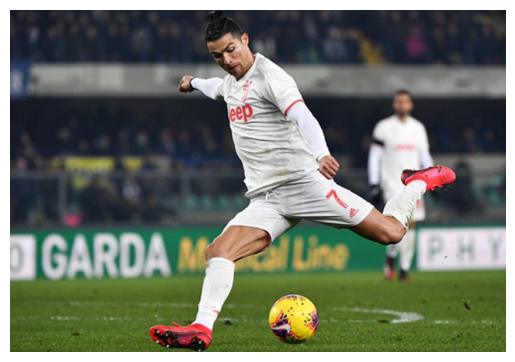

In [23]:
img=Image.open('./cr.jpeg')
img = np.array(img)
bicubic_up(img,2,2)